# Harmonic Analysis - the Nyquist Frequency
#### by Elizabeth Barnes

A demonstration of the Nyquist frequency.

The code directly below disables autoscrolling in this notebook so that you can see all of the figures at the same time.

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (12.0/3, 8.0/3)

COLOR_MAT = ['darkgreen','cornflowerblue','orange','navy','hotpink','grey']

### Waves of different wave-lengths - and why k = N/2 is special.

In this first example, we define a window of 4 units (i.e. x-axis is 4 units long) with a sampling rate of 0.02. 

The examples below show different waves of various wavelengths and how they fit into this window. Since every wavelength can fit in two different ways (either a sine or a cosine), we plot both.

We also calculate the variance of each sine/cosine curve within the window, and give it above each panel.

In [2]:
# user-defined variables and constants
T = 4.0
delta_t = .02
t = np.arange(0.,T+delta_t,delta_t)
N = np.size(t)-1

print('N = ' + str(N) + ': the number of samples in our window of length ' + str(T) + ' units')

N = 200: the number of samples in our window of length 4.0 units


.........
Variance of cos for k = 1: 0.5
Variance of sin for k = 1: 0.5
.........


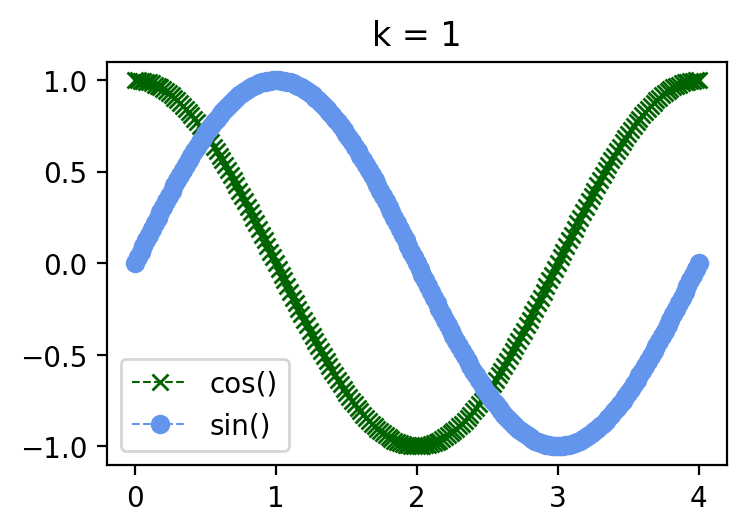

.........
Variance of cos for k = 3: 0.5
Variance of sin for k = 3: 0.5
.........


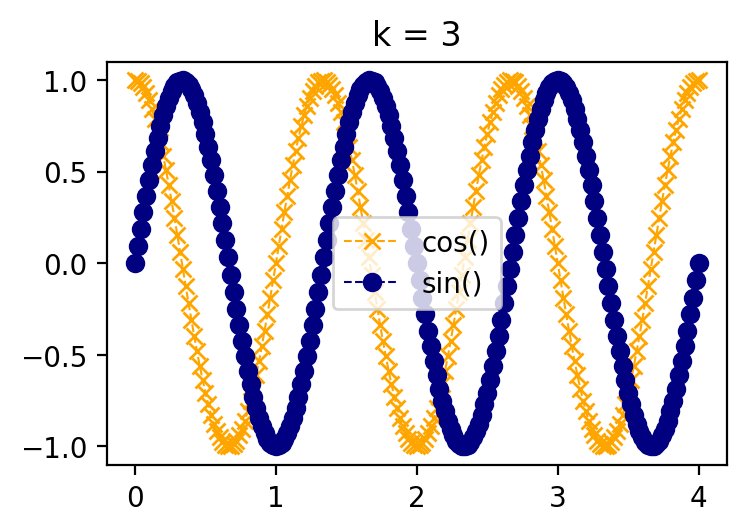

.........
Variance of cos for k = 100.0: 1.0
Variance of sin for k = 100.0: 0.0
.........


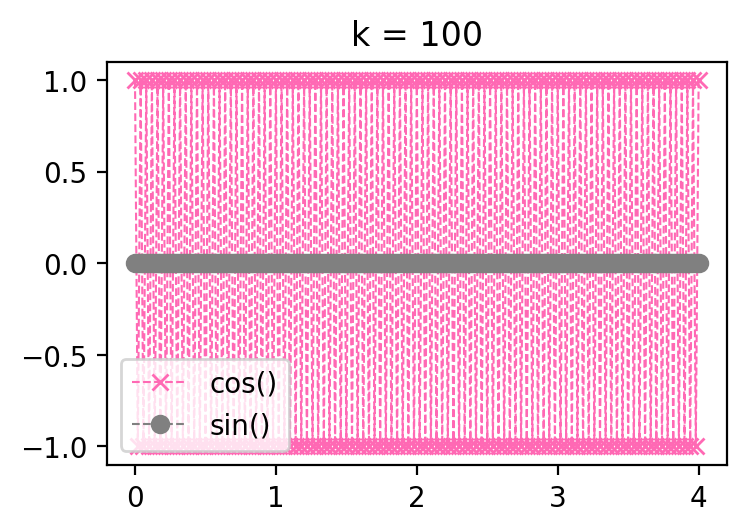

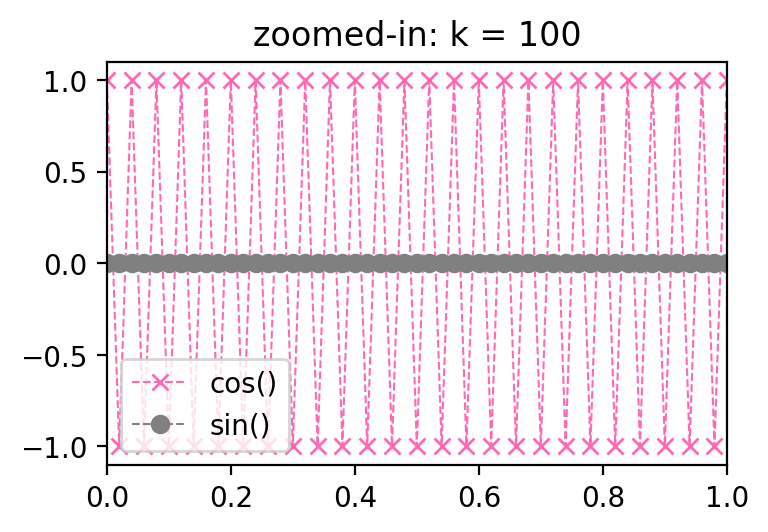

In [3]:
count = 0

for k in (1,3,N/2):
    
    y1 = np.cos(2.*np.pi*k*t/T)
    y2 = np.sin(2.*np.pi*k*t/T)

    print('.........')
    print('Variance of cos for k = ' + str(k) + ': ' + str(np.around(np.var(y1),decimals=2)))
    print('Variance of sin for k = ' + str(k) + ': ' + str(np.around(np.var(y2),decimals=2)))
    print('.........')

    plt.figure()
    plt.plot(t,y1,'x--',color = COLOR_MAT[count],linewidth = 0.75, label = 'cos()')
    plt.plot(t,y2,'o--',color = COLOR_MAT[count+1],linewidth = 0.75, label='sin()')

    plt.title('k = ' + str(int(k)))
    plt.legend()
    plt.show()
    
    if(k==N/2):
        plt.figure()
        plt.plot(t,y1,'x--',color = COLOR_MAT[count],linewidth = 0.75, label = 'cos()')
        plt.plot(t,y2,'o--',color = COLOR_MAT[count+1],linewidth = 0.75, label='sin()')

        plt.xlim(0,1.)
        plt.title('zoomed-in: k = ' + str(int(k)))
        plt.legend()
        plt.show()
        
    
    count = count + 2


The variances for k = 1 and k = 3 are both 0.5, as expected from our calculations in lecture. However, k = 100 is "special", that is, it is the Nyquist frequency for sampling at a rate of 0.02. This is because the Nyquist wavelength = N/2 = 200/2 waves in our 4 unit window. Notice what is important here though is the sampling rate of 0.02. If we modify the sampling rate, we get a different Nyquist wavelength.

This Nyquist frequency/wavelength is special because for cosine we get a variance of 1.0, while for sine we get nothing (zero). That is, the sine curve doesn't actually look like a wave, but rather, just looks like the zero line. 

# Aliasing example

In this example we show what happens when your true data has a higher freuquency than your Nyquist frequency - which again, is determined by your sampling rate. What can happen is that these higher frequencies oscillations can be _aliased_ onto lower frequencies (i.e. can masquerade as lower frequencies).

Now let's imagine that we have an instrument out in the field that only takes a measurement every 1 second. So, let's use blue dots to denote the measurements that we take.

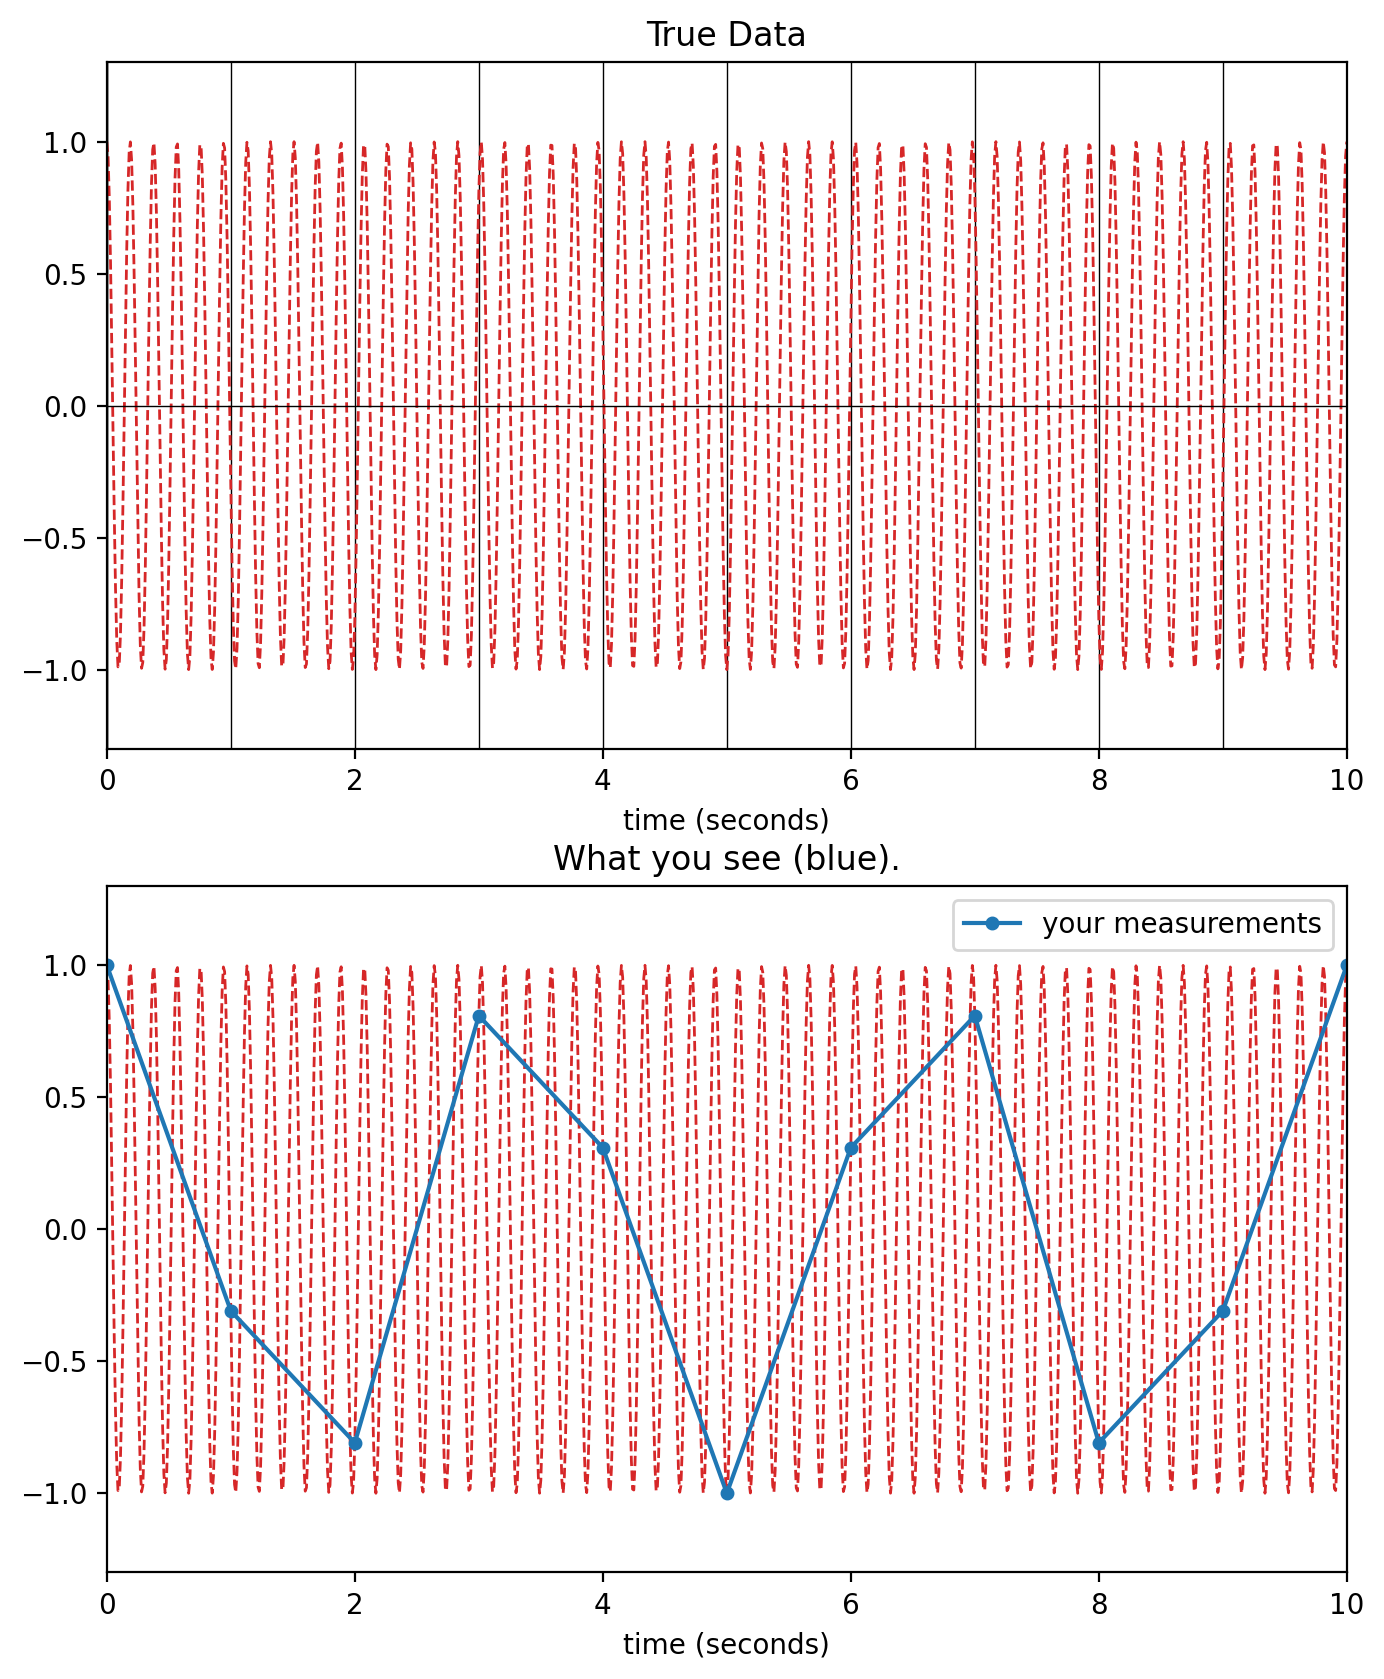

In [4]:
# parameters to change
T = 10.                                 # length of the time series
delta_t = .01                            # "tiny" time step between data points that you cannot measure
t = np.arange(0.,T+delta_t,delta_t)     # this full "tiny" time step vector
k = 53                                  # number of cycles that fit over your data interval T
sample_t = 1.0                          # how often you sample the data
#------------------------------------------------------
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
for i in np.arange(0,11,1):
    plt.plot((i*1.,i*1.),(-2.,2.),'-',color = 'black',linewidth = .5)

y1 = np.cos(2.*np.pi*k*t/T)
plt.plot(t,y1,'--',color = 'tab:red', linewidth = 1.)
# t1 = np.arange(np.min(t),np.max(t)+1,1)
    
plt.axhline(y=0, linewidth=.5, color = 'black')
plt.axvline(x=0, linewidth=.5, color = 'black')

plt.xlim(np.min(t),np.max(t))
plt.ylim(-1.3,1.3)
plt.xlabel('time (seconds)')
plt.title('True Data')

#------------------------------------------------------
plt.subplot(2,1,2)
y1 = np.cos(2.*np.pi*k*t/T)
plt.plot(t,y1,'--',color = 'tab:red', linewidth = 1.)
t1 = np.arange(np.min(t),np.max(t)+sample_t,sample_t)
y11 = np.cos(2.*np.pi*k*t1/T)
plt.plot(t1,y11,'.-',color = 'tab:blue',markersize = 8,label='your measurements')

plt.xlim(np.min(t),np.max(t))
plt.ylim(-1.3,1.3)
plt.xlabel('time (seconds)')
plt.title('What you see (blue).')
plt.legend()

plt.show()

Look at what happened! That blue dots - that is, what we measure, make it look like our data is oscillating at much lower of a frequency than it actually is! That is, the true frequency of our data was _aliased_ onto a wavenumber of k = 3! 

This example demonstrates how important the Nyquist frequency is, and how important it is to know something about your data and its oscllations when you are designing a measurement/sampling strategy.

*To see any updated versions of this notebook, visit https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/harmonic_analysis_nyquist.ipynb*